# Dataset: CIFAR 10

> CIFAR 10


- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp cifar

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *
import fastcore.all as fc
from nbdevAuto import functions
import os
import glob
import shutil
import numpy as np

In [ ]:
# Specify the directory path
directory_path = 'Data/cifar-10-batches-py'

In [ ]:
class Cifar:
    def __init__(self, file_path):
        self.classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        self.file_path = file_path
        self.full_data = self.data_retrieve()
        self.data = self.full_data[1]
        self.items = {self}
    def __len__(self): return "to do"
    def __getitem__(self, i): return "to do"

    def batch_label(self):
        return self.data[b'batch_label']

    def labels(self):
        return np.array(self.data[b'labels'])

    def images(self):
        return self.data[b'data']

    def filenames(self):
        return self.data[b'filenames']

    def data_retrieve(self):
        import pickle
        data = []
        
        # Use glob to find all files starting with 'data' in the specified directory
        matching_files = glob.glob(f'{self.file_path}/data*')
    
        # Print the list of matching files
        for files in matching_files:
            with open(files, 'rb') as fo:
                dict = pickle.load(fo, encoding='bytes')
            data.append(dict)
    
        return data

In [ ]:
cifar = Cifar(directory_path)

In [ ]:
len(cifar.full_data)

5

In [ ]:
cifar.data

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [ ]:
type(cifar.data)

dict

In [ ]:
keys = list(cifar.data.keys())
keys

[b'batch_label', b'labels', b'data', b'filenames']

In [ ]:
cifar.data[b'batch_label']

b'training batch 1 of 5'

In [ ]:
cifar.labels()

array([6, 9, 9, ..., 1, 1, 5])

In [ ]:
cifar.images()

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [ ]:
cifar.filenames()

[b'leptodactylus_pentadactylus_s_000004.png',
 b'camion_s_000148.png',
 b'tipper_truck_s_001250.png',
 b'american_elk_s_001521.png',
 b'station_wagon_s_000293.png',
 b'coupe_s_001735.png',
 b'cassowary_s_001300.png',
 b'cow_pony_s_001168.png',
 b'sea_boat_s_001584.png',
 b'tabby_s_001355.png',
 b'muntjac_s_001000.png',
 b'arabian_s_001354.png',
 b'quarter_horse_s_000672.png',
 b'passerine_s_000343.png',
 b'camion_s_001895.png',
 b'trailer_truck_s_000335.png',
 b'dumper_s_000821.png',
 b'alley_cat_s_000200.png',
 b'accentor_s_000677.png',
 b'frog_s_001671.png',
 b'capreolus_capreolus_s_000051.png',
 b'tomcat_s_000772.png',
 b'pickerel_frog_s_000446.png',
 b'bufo_s_001242.png',
 b'cassowary_s_001246.png',
 b'toad_s_001748.png',
 b'cat_s_000081.png',
 b'chihuahua_s_000825.png',
 b'alces_alces_s_000959.png',
 b'stealth_bomber_s_000554.png',
 b'twinjet_s_000663.png',
 b'trucking_rig_s_001402.png',
 b'auto_s_000609.png',
 b'tabby_cat_s_000983.png',
 b'wapiti_s_000416.png',
 b'monoplane_s_000

In [ ]:
def image_reshape(image):
    # Assuming `info.images()` returns a list of images, and you want the second image   
    # Reshape image1 into a 32x32x3 array
    reshaped_array = image.reshape(3, 32, 32)
    
    # Convert the reshaped array to uint8 data type
    reshaped_array = reshaped_array.astype(np.uint8)
    
    # Transpose the dimensions to get the desired shape (32x32x3)
    reshaped_array = np.transpose(reshaped_array, (1, 2, 0))
    
    # Print the shape of the reshaped array to confirm
    return reshaped_array

    

In [ ]:
image = image_reshape(cifar.images()[1])

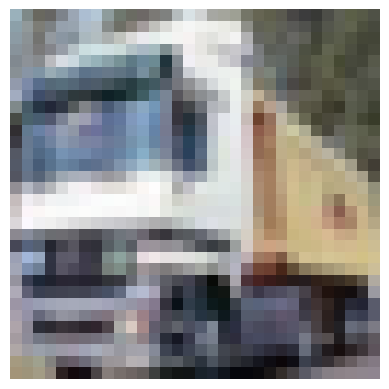

In [ ]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()